In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
import warnings
import cv2
warnings.filterwarnings('ignore')


C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.preprocessing import *

In [4]:
img = image.load_img('./xray_images/train/NORMAL/IM-0115-0001.jpeg')

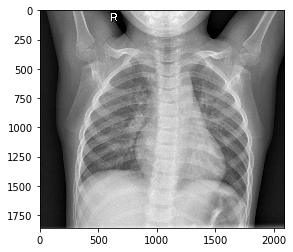

In [5]:
plt.imshow(img)

In [6]:
cv2.imread('./xray_images/train/NORMAL/IM-0115-0001.jpeg').shape

(1858, 2090, 3)

In [7]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)    

NameError: name 'ImageDataGenerator' is not defined

In [8]:
train_set = train.flow_from_directory('./xray_images/train/',
                                     target_size=(64,64),
                                     batch_size=32,
                                     class_mode='binary')

Found 5216 images belonging to 2 classes.


In [9]:
test_set = test.flow_from_directory('./xray_images/test/',
                                     target_size=(64,64),
                                     batch_size=32,
                                     class_mode='binary')

Found 624 images belonging to 2 classes.


In [10]:
train_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [11]:
input_shape = (64,64,3)

In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',
                input_shape=input_shape,
                activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),
              
                activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=(3,3),
              
                activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
opt = tf.keras.optimizers.Adam(lr=0.001)

In [14]:
model.compile(loss='binary_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0

In [15]:
batch_size = 32
epochs = 10

model.fit(train_set,batch_size=batch_size,epochs=epochs,validation_data=test_set,verbose=1)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
163/163 [==============================] - 118s 726ms/step - loss: 0.4900 - accuracy: 0.7661 - val_loss: 0.6409 - val_accuracy: 0.6474
Epoch 2/10
163/163 [==============================] - 116s 715ms/step - loss: 0.2971 - accuracy: 0.8710 - val_loss: 0.3812 - val_accuracy: 0.8446
Epoch 3/10
163/163 [==============================] - 117s 717ms/step - loss: 0.2368 - accuracy: 0.8990 - val_loss: 0.7258 - val_accuracy: 0.7660
Epoch 4/10
163/163 [==============================] - 118s 725ms/step - loss: 0.1780 - accuracy: 0.9279 - val_loss: 0.7508 - val_accuracy: 0.7067
Epoch 5/10
163/163 [==============================] - 117s 719ms/step - loss: 0.1456 - accuracy: 0.9408 - val_loss: 0.3597 - val_accuracy: 0.8413
Epoch 6/10
163/163 [==============================] - 118s 724ms/step - loss: 0.1466 - accuracy: 0.9446 - val_loss: 0.9206 - val_accuracy: 0.7308
Epoch 7/10
163/163 [==========

In [16]:
unseen = image.load_img('./xray_images/val/NORMAL/NORMAL2-IM-1440-0001.jpeg',target_size=(64,64))
unseen_img = image.img_to_array(unseen)
unseen_img = np.expand_dims(unseen_img,axis=0)

In [17]:
pred = model.predict(unseen_img)

In [18]:
if pred[0]==1:
    print("PNEUMONIA")
else:
    print("Normal")

Normal
